# DATA COLLECTION

In [2]:
import pandas as pd
import numpy as np

# Import the dataset
df = pd.read_csv('heart_disease_health_indicators.csv')  # Replace with your actual file path

# DATA DESCRIPTION

In [3]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   Diabetes              253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [4]:
# Display summary statistics
print(df.describe())


       HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253680.000000  253680.000000  253680.000000  253680.000000   
mean               0.094186       0.429001       0.424121       0.962670   
std                0.292087       0.494934       0.494210       0.189571   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean       28.382364       0.443169       0.040571       0.296921   
std         6.608694       0.496761       0.197294       0.698160   
min        12.000000       0.000000    

In [5]:

# Display the first few rows
print(df.head())



   HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                     0       1         1          1   40       1       0   
1                     0       0         0          0   25       1       0   
2                     0       1         1          1   28       0       0   
3                     0       1         0          1   27       0       0   
4                     0       1         1          1   24       0       0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0         0             0       0  ...              1            0        5   
1         0             1       0  ...              0            1        3   
2         0             0       1  ...              1            1        5   
3         0             1       1  ...              1            0        2   
4         0             1       1  ...              1            0        2   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  

In [6]:
# Check for missing values
print(df.isnull().sum())

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


# DATA CLEANING

In [7]:
categorical_columns = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 
                       'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 
                       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 
                       'DiffWalk', 'Sex', 'Education', 'Income']

for col in categorical_columns:
    df[col] = df[col].astype('category')

In [8]:
print(df[['BMI', 'MentHlth', 'PhysHlth', 'Age']].describe())

                 BMI       MentHlth       PhysHlth            Age
count  253680.000000  253680.000000  253680.000000  253680.000000
mean       28.382364       3.184772       4.242081       8.032119
std         6.608694       7.412847       8.717951       3.054220
min        12.000000       0.000000       0.000000       1.000000
25%        24.000000       0.000000       0.000000       6.000000
50%        27.000000       0.000000       0.000000       8.000000
75%        31.000000       2.000000       3.000000      10.000000
max        98.000000      30.000000      30.000000      13.000000


In [9]:
binary_columns = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 
                  'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 
                  'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

for col in binary_columns:
    df[col] = df[col].map({0: 0, 1: 1})

In [10]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    df.drop_duplicates(inplace=True)

Number of duplicate rows: 23899


In [11]:
# Remove duplicates and reset the index
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

# Verify the duplicates are removed
print(f"Number of rows after removing duplicates: {len(df)}")
print(f"Number of duplicate rows remaining: {df.duplicated().sum()}")

Number of rows after removing duplicates: 229781
Number of duplicate rows remaining: 0


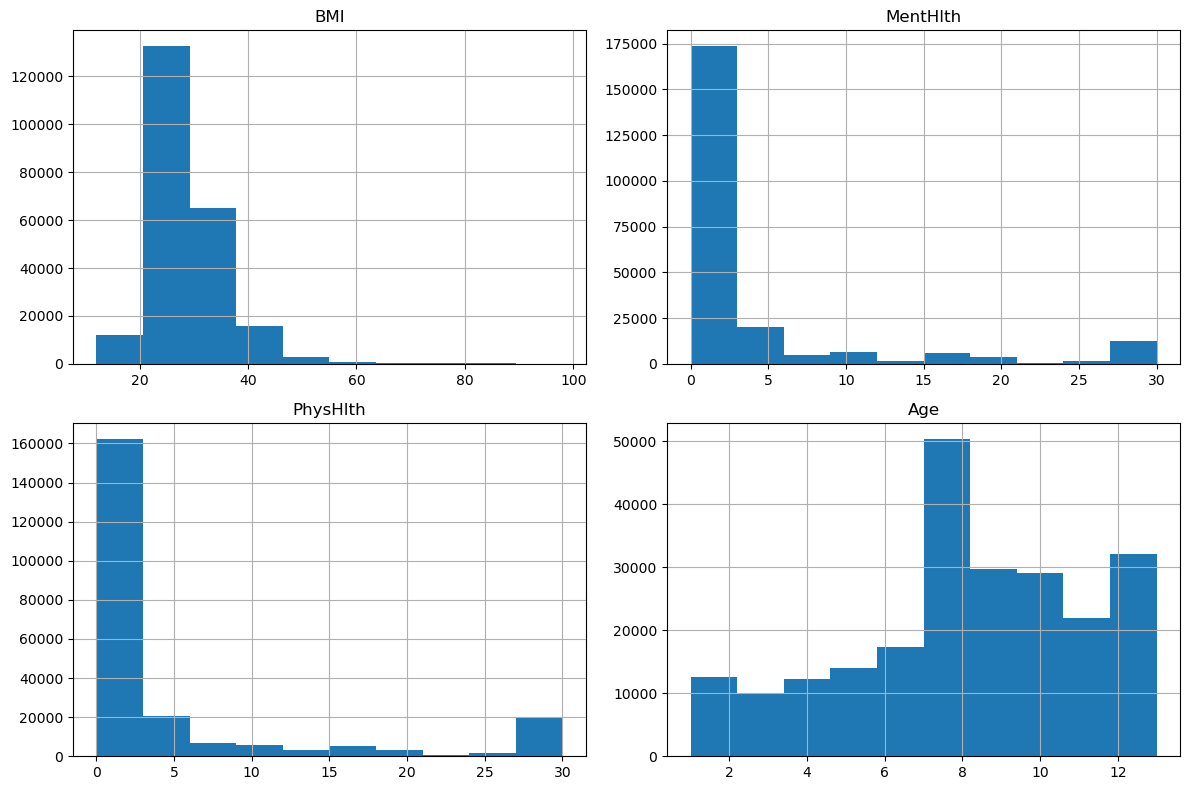

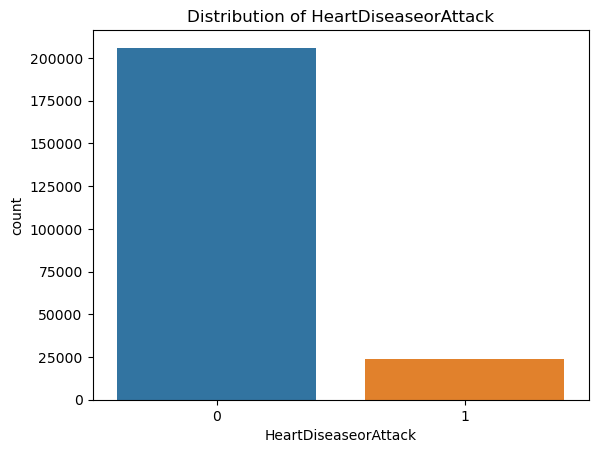

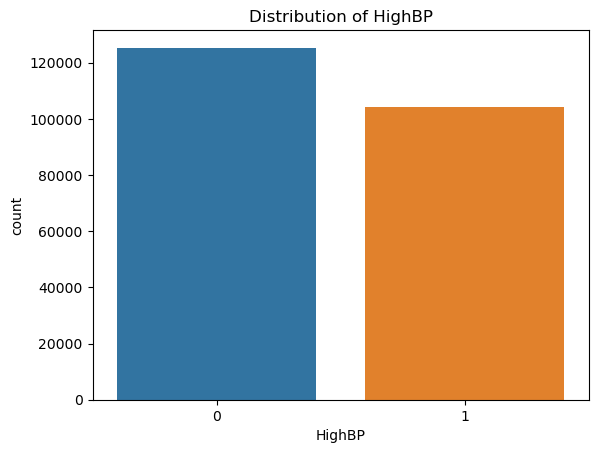

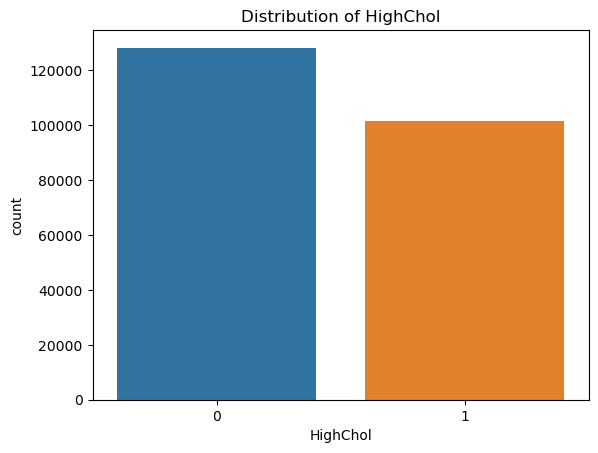

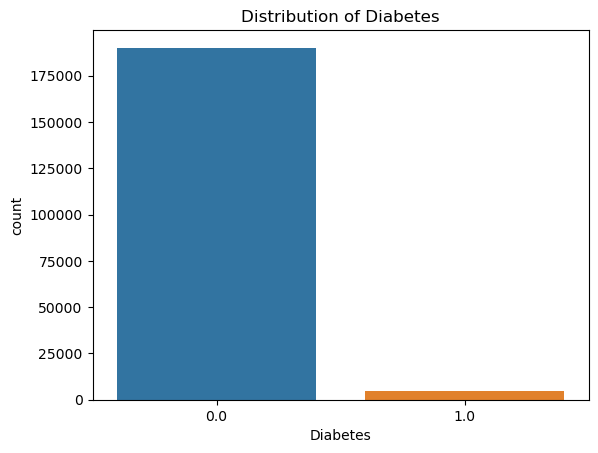

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# For numerical variables
numerical_cols = ['BMI', 'MentHlth', 'PhysHlth', 'Age']
df[numerical_cols].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# For categorical variables
categorical_cols = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'Diabetes']
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# CORRELATION ANALYSIS

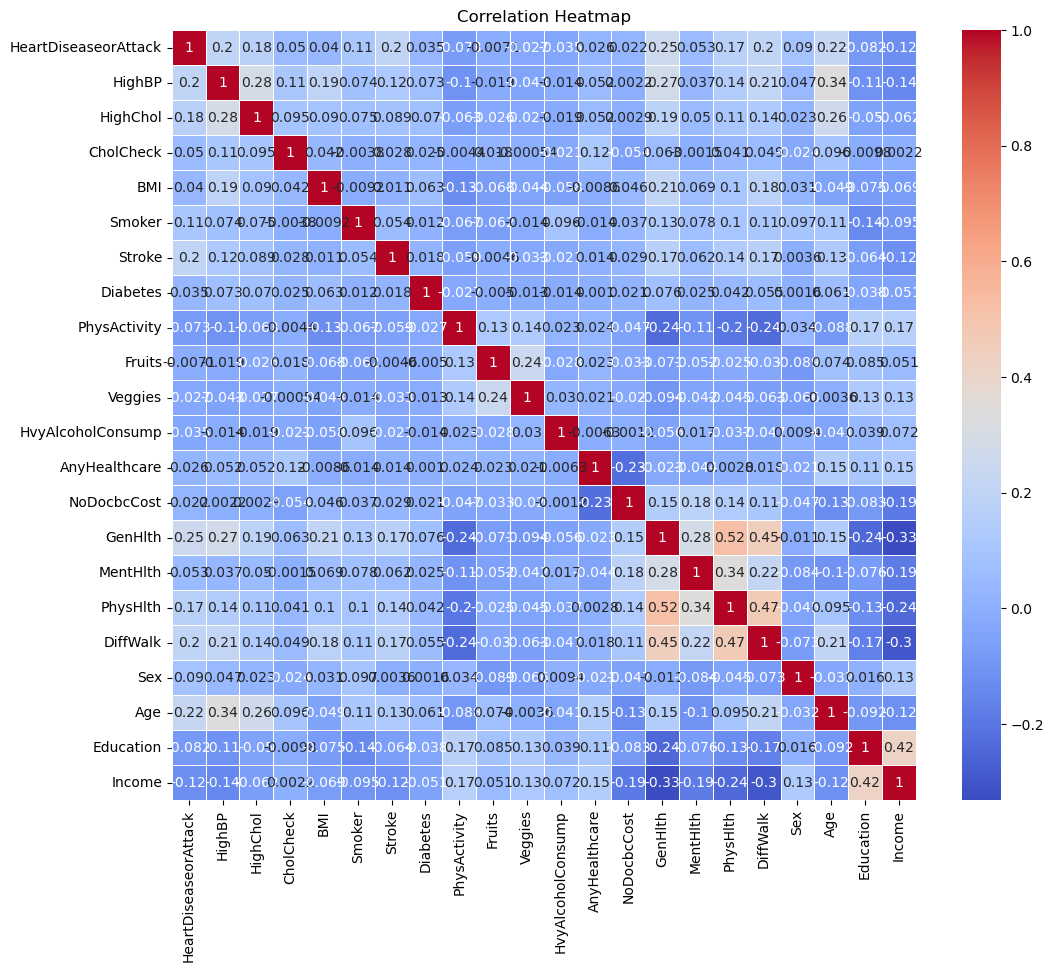

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Chelsa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


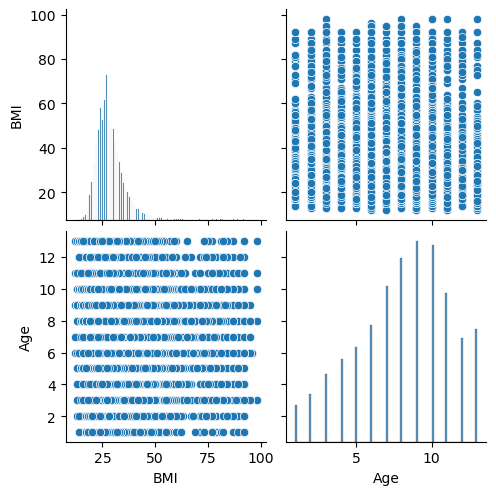

In [14]:
sns.pairplot(df[['HeartDiseaseorAttack', 'BMI', 'Age', 'HighBP', 'HighChol']])
plt.show()

In [15]:
print(df[['HeartDiseaseorAttack'] + lifestyle_factors].dtypes)

for col in ['HeartDiseaseorAttack'] + lifestyle_factors:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts(dropna=False))

HeartDiseaseorAttack    category
Smoker                  category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
dtype: object

Unique values in HeartDiseaseorAttack:
HeartDiseaseorAttack
0    206064
1     23717
Name: count, dtype: int64

Unique values in Smoker:
Smoker
0    122781
1    107000
Name: count, dtype: int64

Unique values in PhysActivity:
PhysActivity
1    168511
0     61270
Name: count, dtype: int64

Unique values in Fruits:
Fruits
1    140848
0     88933
Name: count, dtype: int64

Unique values in Veggies:
Veggies
1    182633
0     47148
Name: count, dtype: int64

Unique values in HvyAlcoholConsump:
HvyAlcoholConsump
0    215831
1     13950
Name: count, dtype: int64


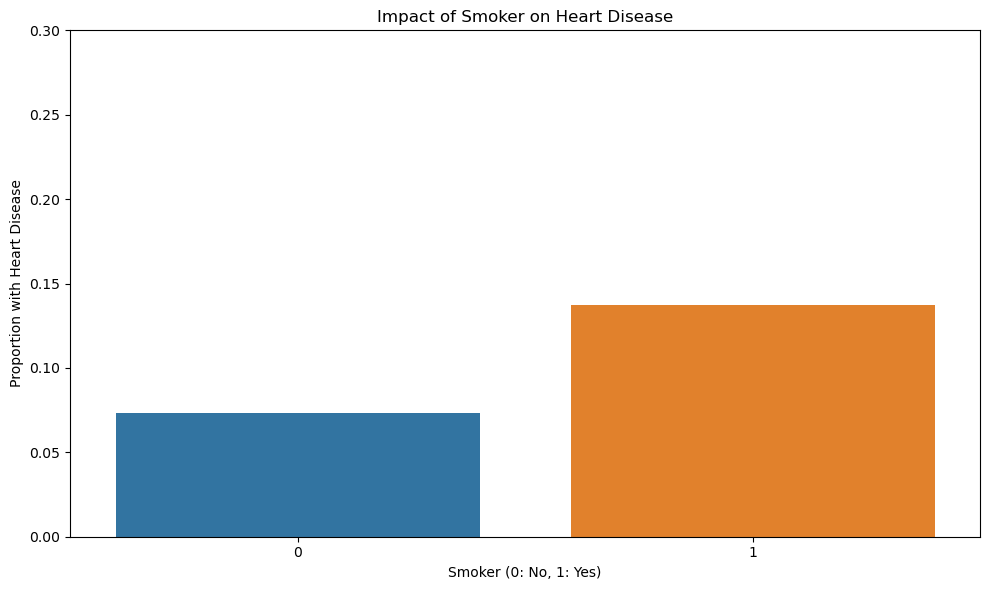


Data for Smoker:
HeartDiseaseorAttack         0         1
Smoker                                  
0                     0.926650  0.073350
1                     0.862514  0.137486
Correlation with Heart Disease: 0.10515441785668599


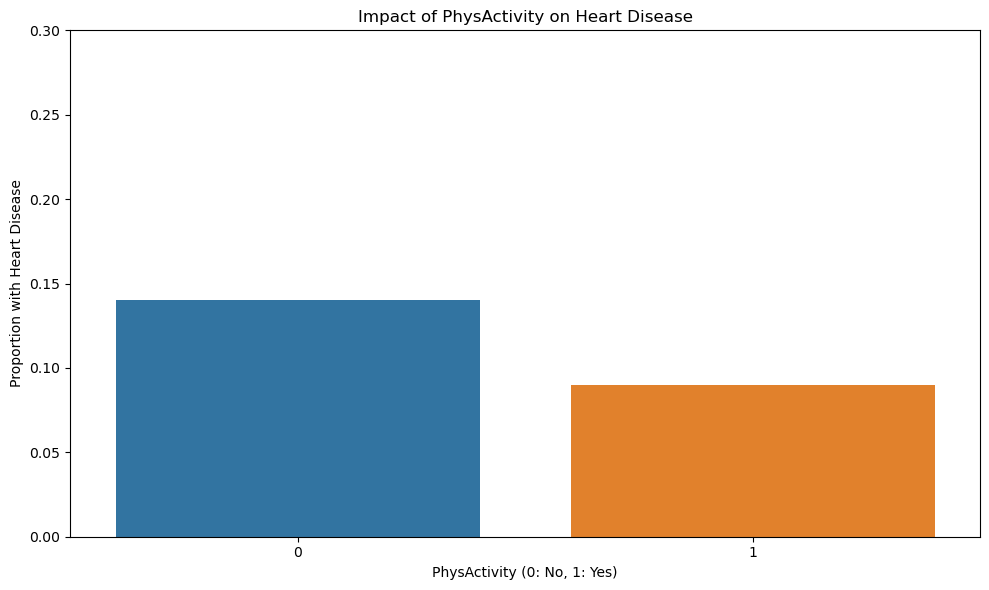


Data for PhysActivity:
HeartDiseaseorAttack         0         1
PhysActivity                            
0                     0.859817  0.140183
1                     0.910225  0.089775
Correlation with Heart Disease: -0.07326704665540902


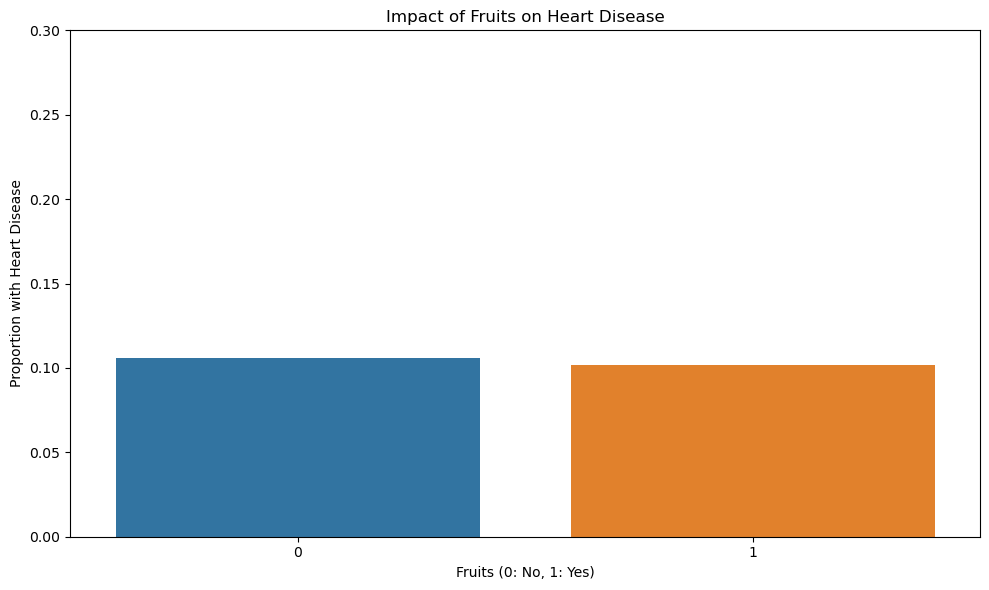


Data for Fruits:
HeartDiseaseorAttack         0         1
Fruits                                  
0                     0.894055  0.105945
1                     0.898508  0.101492
Correlation with Heart Disease: -0.007128256208859767


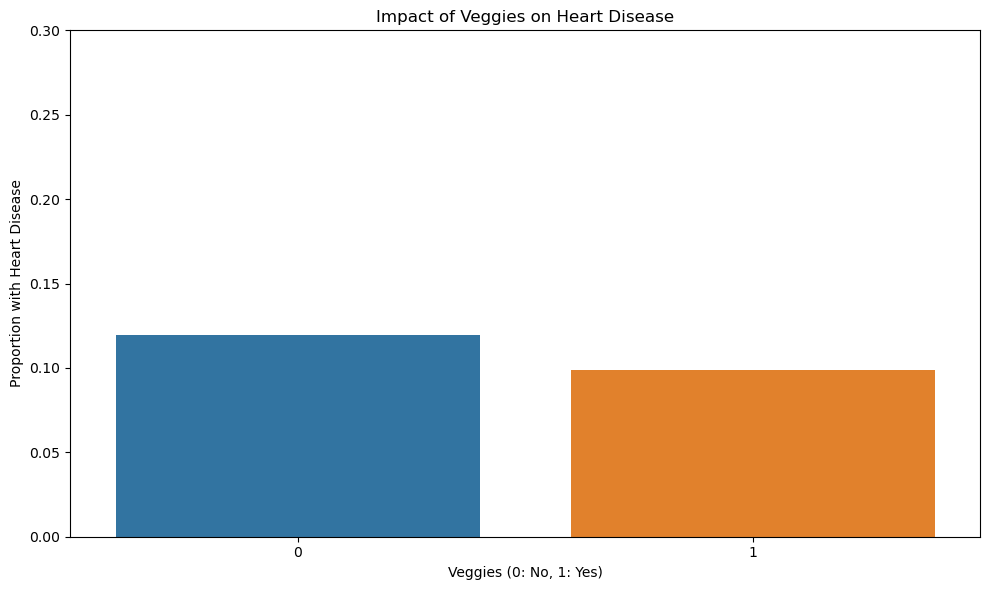


Data for Veggies:
HeartDiseaseorAttack         0         1
Veggies                                 
0                     0.880419  0.119581
1                     0.901009  0.098991
Correlation with Heart Disease: -0.027330471912583577


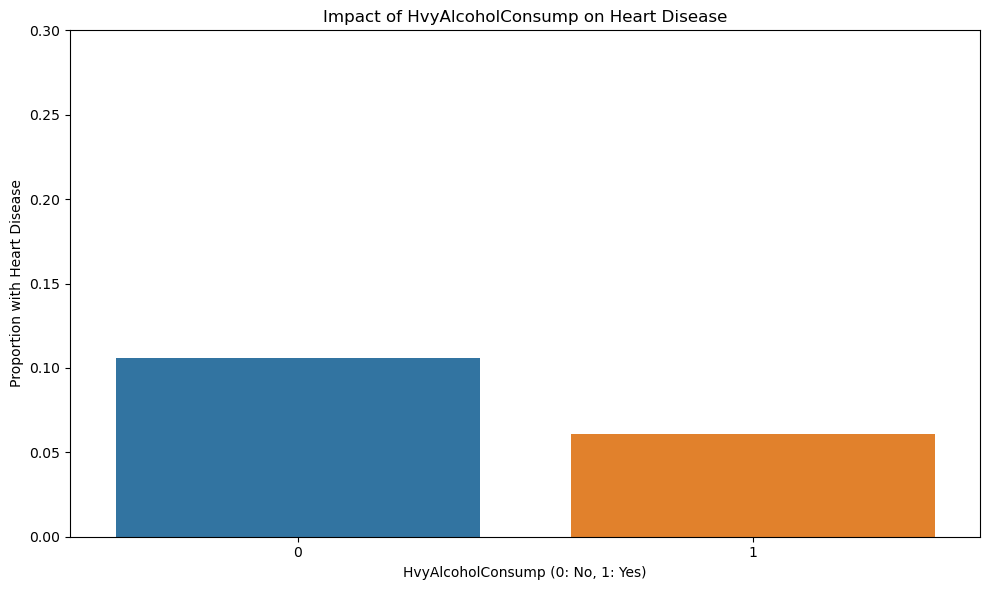


Data for HvyAlcoholConsump:
HeartDiseaseorAttack         0         1
HvyAlcoholConsump                       
0                     0.894042  0.105958
1                     0.939211  0.060789
Correlation with Heart Disease: -0.03545333757997951


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

lifestyle_factors = ['Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

for factor in lifestyle_factors:
    # Calculate the proportion of heart disease for each category in the factor
    cross_tab = pd.crosstab(df[factor], df['HeartDiseaseorAttack'], normalize='index')
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cross_tab.index.astype(str), y=cross_tab[1])
    plt.title(f'Impact of {factor} on Heart Disease')
    plt.xlabel(f'{factor} (0: No, 1: Yes)')
    plt.ylabel('Proportion with Heart Disease')
    plt.ylim(0, 0.3)  # Adjust this based on your data
    plt.tight_layout()
    plt.show()

    # Print the data for verification
    print(f"\nData for {factor}:")
    print(cross_tab)
    print(f"Correlation with Heart Disease: {df[factor].corr(df['HeartDiseaseorAttack'])}")

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Summary of Lifestyle Factors:
                   Correlation  Proportion with Factor  \
PhysActivity               1.0                0.733355   
Fruits                     1.0                0.612966   
Veggies                    1.0                0.794813   
HvyAlcoholConsump          1.0                0.060710   
Smoker                    -1.0                0.465661   

                   Heart Disease Rate when Factor Present  
PhysActivity                                     0.089775  
Fruits                                           0.101492  
Veggies                                          0.098991  
HvyAlcoholConsump                                0.060789  
Smoker                                           0.137486  

Crosstab for Smoker:
HeartDiseaseorAttack         0         1
Smoker                                  
0                     0.926650  0.073350
1                     0.862514  0.137486


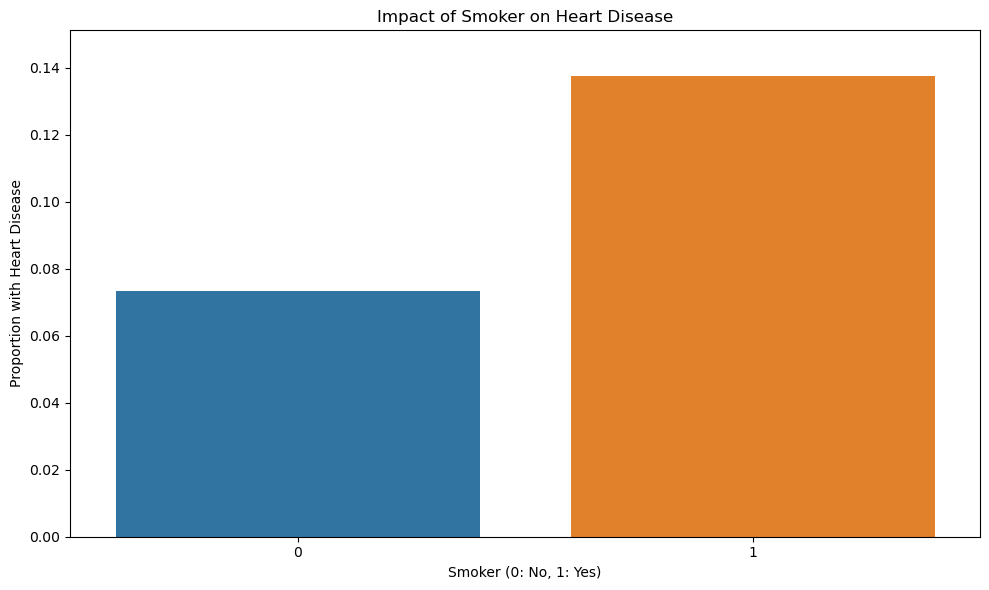

Correlation with Heart Disease: -1.0

Crosstab for PhysActivity:
HeartDiseaseorAttack         0         1
PhysActivity                            
0                     0.859817  0.140183
1                     0.910225  0.089775


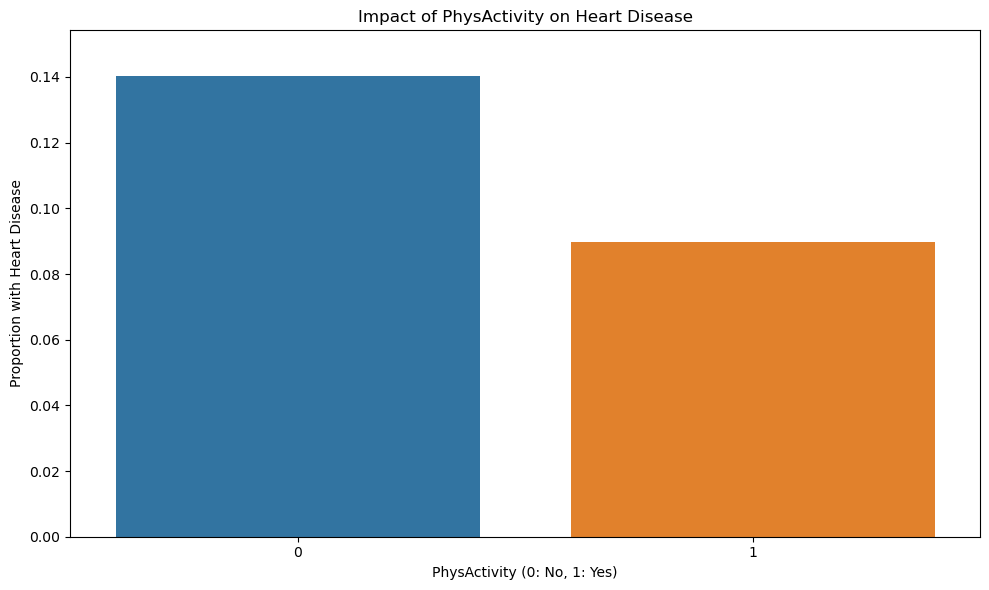

Correlation with Heart Disease: 1.0

Crosstab for Fruits:
HeartDiseaseorAttack         0         1
Fruits                                  
0                     0.894055  0.105945
1                     0.898508  0.101492


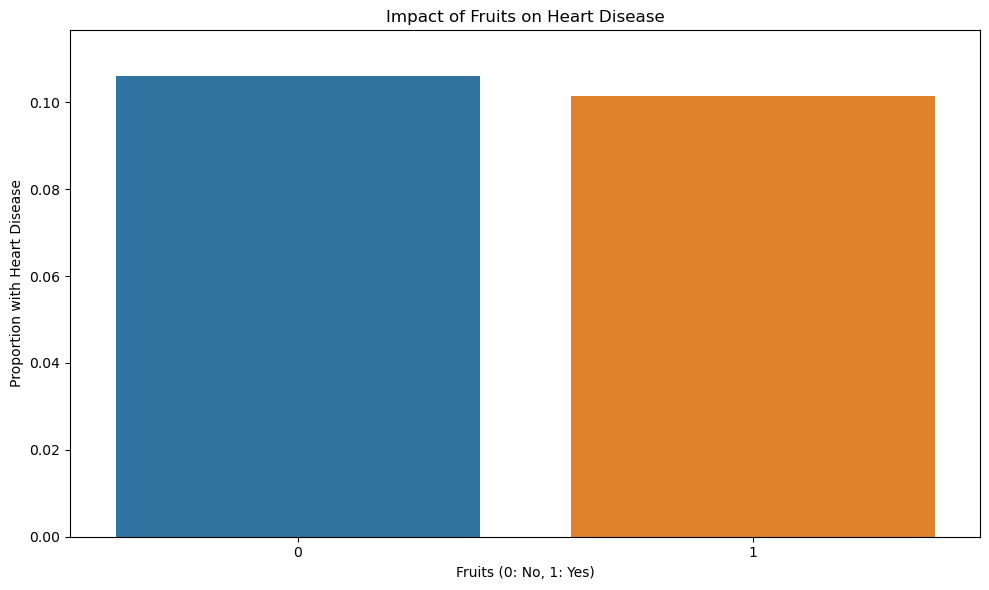

Correlation with Heart Disease: 1.0

Crosstab for Veggies:
HeartDiseaseorAttack         0         1
Veggies                                 
0                     0.880419  0.119581
1                     0.901009  0.098991


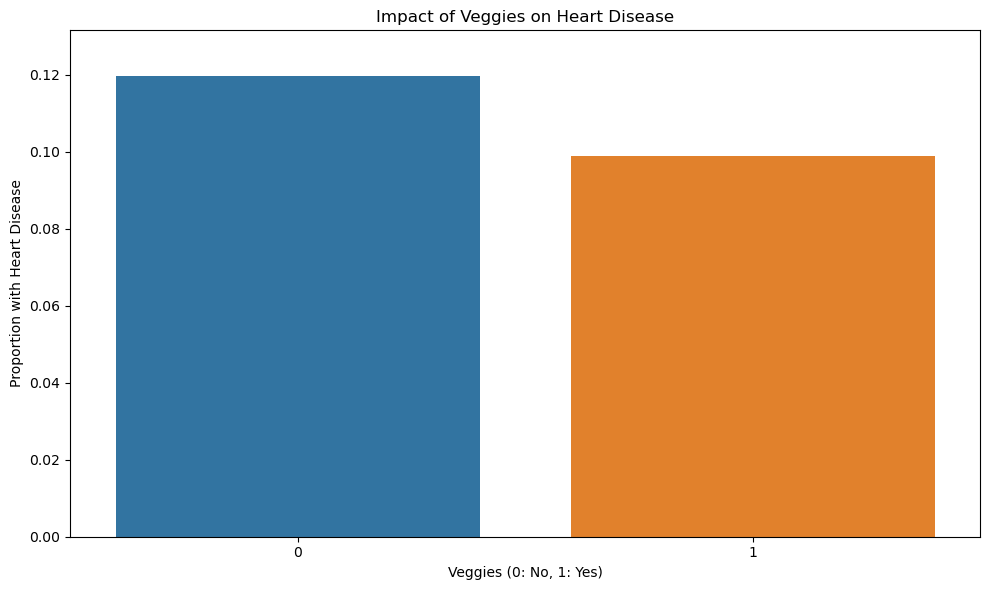

Correlation with Heart Disease: 1.0

Crosstab for HvyAlcoholConsump:
HeartDiseaseorAttack         0         1
HvyAlcoholConsump                       
0                     0.894042  0.105958
1                     0.939211  0.060789


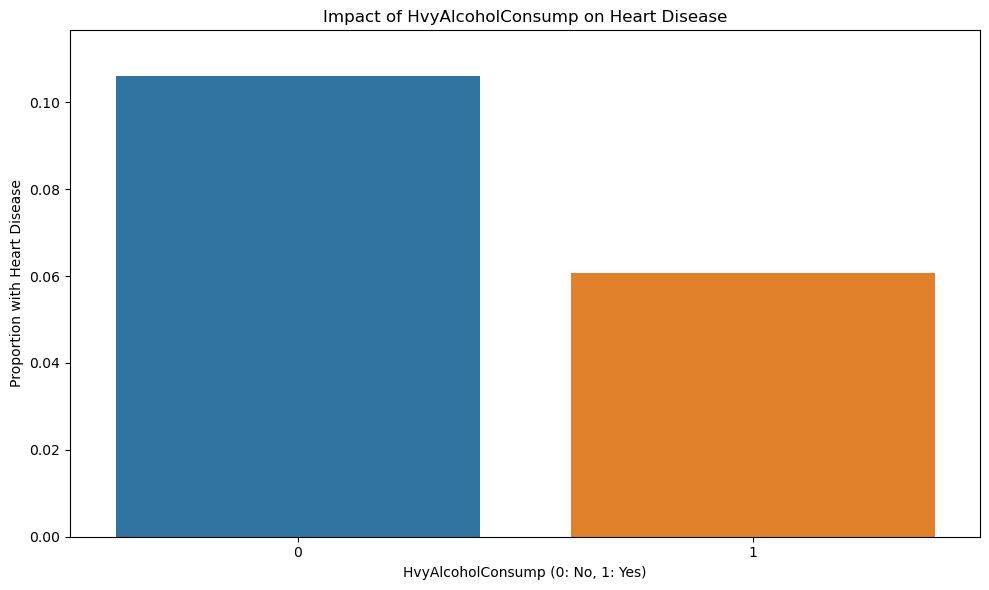

Correlation with Heart Disease: 1.0


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lifestyle_factors = ['Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

# Function to calculate correlation for categorical variables
def categorical_correlation(x, y):
    return pd.crosstab(x, y).corr('pearson').iloc[0, 1]

# Calculate correlations
correlations = {factor: categorical_correlation(df[factor], df['HeartDiseaseorAttack']) for factor in lifestyle_factors}

# Calculate proportions
proportions = {}
factor_presence = {}
heart_disease_rates = {}

for factor in lifestyle_factors:
    # Convert to numeric for calculations
    factor_numeric = df[factor].cat.codes
    heart_disease_numeric = df['HeartDiseaseorAttack'].cat.codes
    
    factor_presence[factor] = (factor_numeric == 1).mean()
    heart_disease_rates[factor] = heart_disease_numeric[factor_numeric == 1].mean()

# Create a summary dataframe
summary = pd.DataFrame({
    'Correlation': correlations,
    'Proportion with Factor': factor_presence,
    'Heart Disease Rate when Factor Present': heart_disease_rates
})

print("\nSummary of Lifestyle Factors:")
print(summary.sort_values('Correlation', ascending=False))

# Visualization
for factor in lifestyle_factors:
    # Calculate the proportion of heart disease for each category in the factor
    cross_tab = pd.crosstab(df[factor], df['HeartDiseaseorAttack'], normalize='index')
    
    print(f"\nCrosstab for {factor}:")
    print(cross_tab)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cross_tab.index.astype(str), y=cross_tab.iloc[:, 1])  # Use the second column for heart disease presence
    plt.title(f'Impact of {factor} on Heart Disease')
    plt.xlabel(f'{factor} (0: No, 1: Yes)')
    plt.ylabel('Proportion with Heart Disease')
    plt.ylim(0, cross_tab.iloc[:, 1].max() * 1.1)  # Set y-axis limit to slightly above the maximum value
    plt.tight_layout()
    plt.show()

    print(f"Correlation with Heart Disease: {correlations[factor]}")

# SUMMARISING FINDINGS

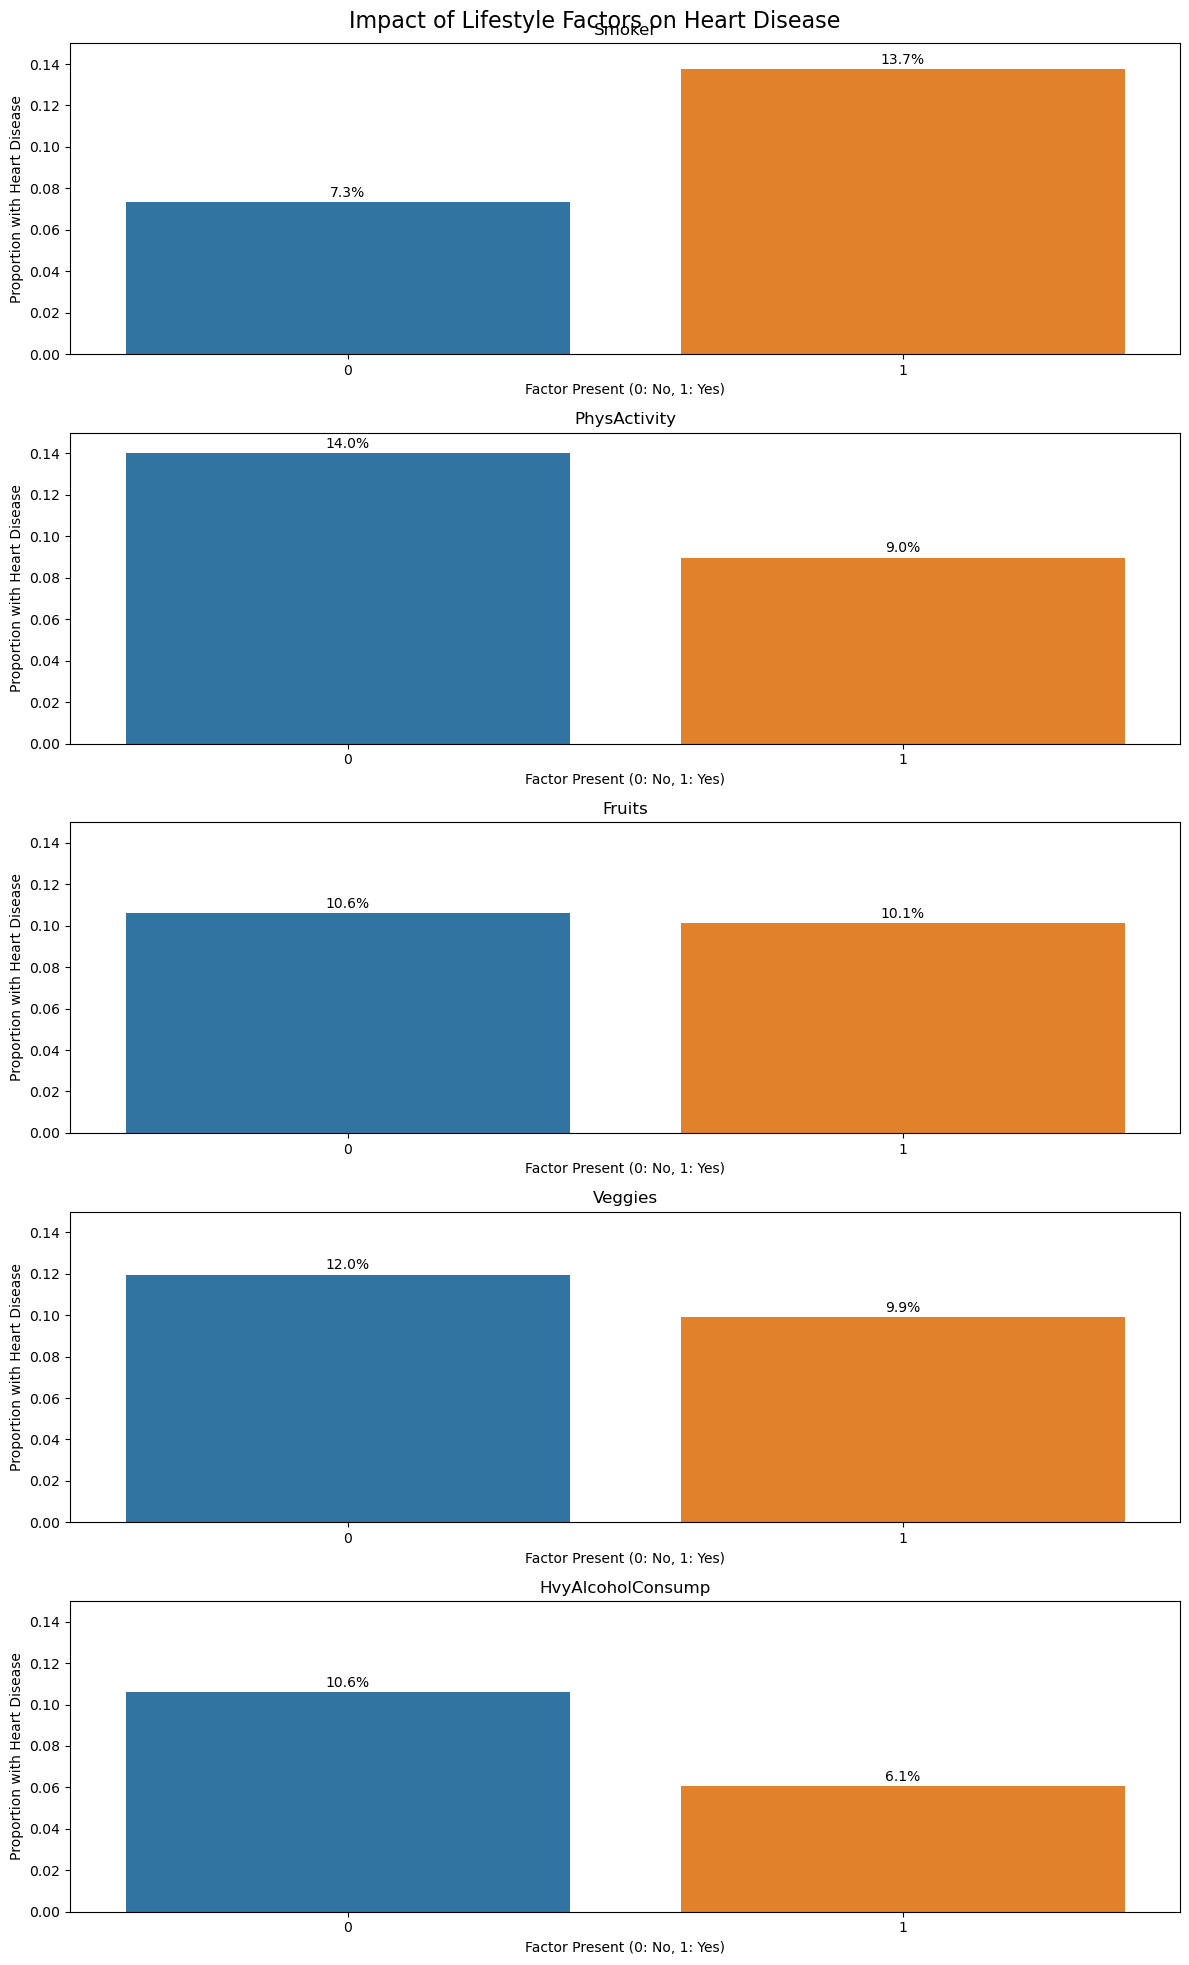


Summary of Lifestyle Factors:
                   Proportion with Factor  \
Smoker                           0.465661   
Fruits                           0.612966   
Veggies                          0.794813   
PhysActivity                     0.733355   
HvyAlcoholConsump                0.060710   

                   Heart Disease Rate when Factor Present  \
Smoker                                           0.137486   
Fruits                                           0.101492   
Veggies                                          0.098991   
PhysActivity                                     0.089775   
HvyAlcoholConsump                                0.060789   

                   Heart Disease Rate when Factor Absent  
Smoker                                          0.073350  
Fruits                                          0.105945  
Veggies                                         0.119581  
PhysActivity                                    0.140183  
HvyAlcoholConsump                   

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your dataframe
lifestyle_factors = ['Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

fig, axes = plt.subplots(len(lifestyle_factors), 1, figsize=(12, 4*len(lifestyle_factors)))
fig.suptitle('Impact of Lifestyle Factors on Heart Disease', fontsize=16)

for i, factor in enumerate(lifestyle_factors):
    cross_tab = pd.crosstab(df[factor], df['HeartDiseaseorAttack'], normalize='index')
    
    sns.barplot(x=cross_tab.index.astype(str), y=cross_tab.iloac[:, 1], ax=axes[i])
    axes[i].set_title(f'{factor}')
    axes[i].set_xlabel('Factor Present (0: No, 1: Yes)')
    axes[i].set_ylabel('Proportion with Heart Disease')
    axes[i].set_ylim(0, 0.15)  # Adjust this if needed
    
    # Add percentage labels on bars
    for j, p in enumerate(axes[i].patches):
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width()/2., height + 0.001,
                     f'{height:.1%}',
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print summary statistics
summary = pd.DataFrame({
    'Proportion with Factor': factor_presence,
    'Heart Disease Rate when Factor Present': heart_disease_rates,
    'Heart Disease Rate when Factor Absent': {factor: pd.crosstab(df[factor], df['HeartDiseaseorAttack'], normalize='index').iloc[0, 1] for factor in lifestyle_factors}
})

print("\nSummary of Lifestyle Factors:")
print(summary.sort_values('Heart Disease Rate when Factor Present', ascending=False))

In [ ]:
# ------------------------------------------------------------------------------------------------------

In [ ]:
# ------------------------------------------------------------------------------------------------------

In [23]:
print(df.info())
print("\nSample of the data:")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229781 entries, 0 to 229780
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   HeartDiseaseorAttack  229781 non-null  category
 1   HighBP                229781 non-null  category
 2   HighChol              229781 non-null  category
 3   CholCheck             229781 non-null  category
 4   BMI                   229781 non-null  int64   
 5   Smoker                229781 non-null  category
 6   Stroke                229781 non-null  category
 7   Diabetes              194684 non-null  float64 
 8   PhysActivity          229781 non-null  category
 9   Fruits                229781 non-null  category
 10  Veggies               229781 non-null  category
 11  HvyAlcoholConsump     229781 non-null  category
 12  AnyHealthcare         229781 non-null  category
 13  NoDocbcCost           229781 non-null  category
 14  GenHlth               229781 non-nul

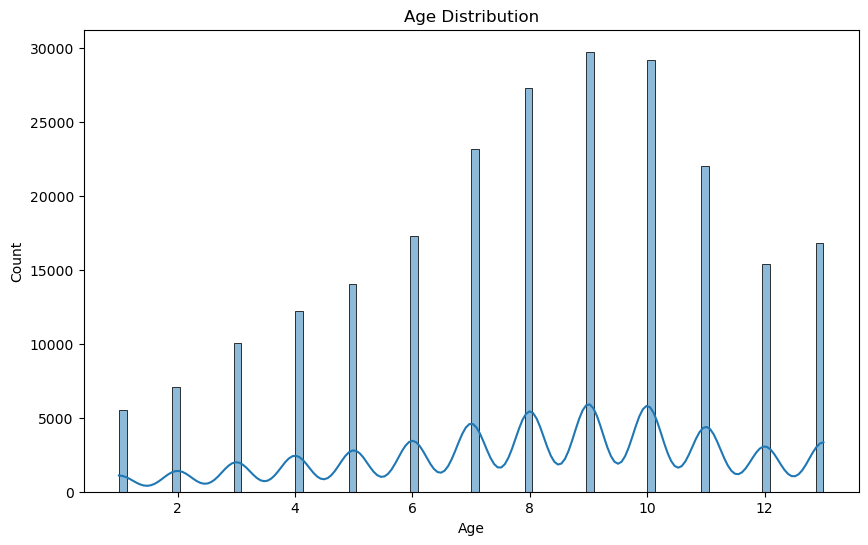

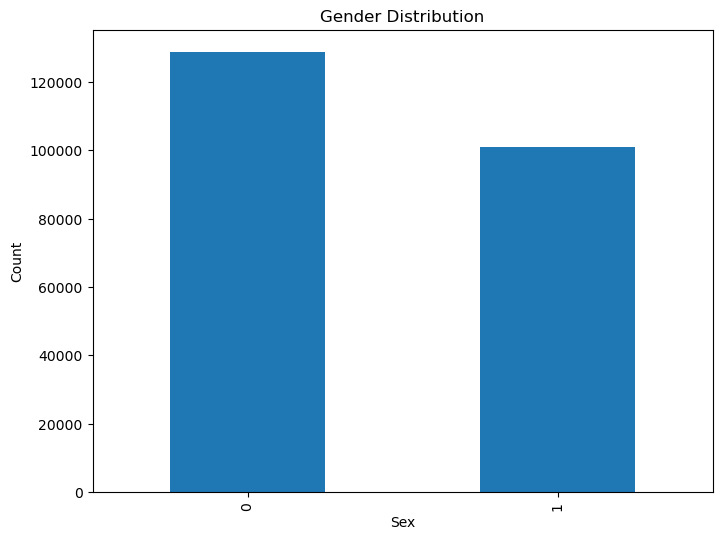

Heart Disease Rates by Gender:
Sex
0    0.079058
1    0.134057
Name: HeartDiseaseorAttack, dtype: float64

Heart Disease Rates by Gender (Percentage):
Sex
0     7.905847
1    13.405729
Name: HeartDiseaseorAttack, dtype: float64

Detailed Heart Disease Counts by Gender:
HeartDiseaseorAttack          0          1
Sex                                       
0                     92.094153   7.905847
1                     86.594271  13.405729


In [26]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Gender distribution
gender_counts = df['Sex'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar')
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.show()


# Convert 'HeartDiseaseorAttack' to numeric
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].cat.codes

# Now calculate the mean (which will give us the proportion of '1's)
print("Heart Disease Rates by Gender:")
print(df.groupby('Sex')['HeartDiseaseorAttack'].mean())

# If you want percentages, multiply by 100
print("\nHeart Disease Rates by Gender (Percentage):")
print(df.groupby('Sex')['HeartDiseaseorAttack'].mean() * 100)

# To get a more detailed breakdown:
print("\nDetailed Heart Disease Counts by Gender:")
print(pd.crosstab(df['Sex'], df['HeartDiseaseorAttack'], normalize='index') * 100)

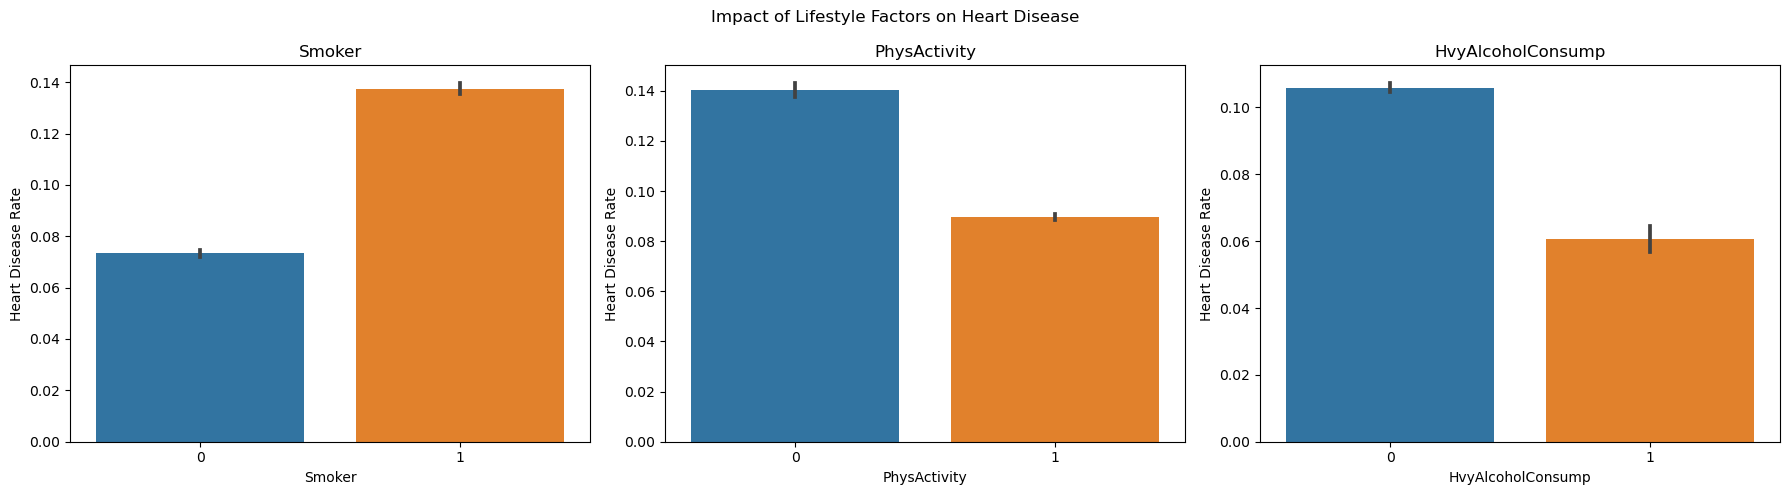

In [27]:
lifestyle_factors = ['Smoker', 'PhysActivity', 'HvyAlcoholConsump']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Impact of Lifestyle Factors on Heart Disease')

for i, factor in enumerate(lifestyle_factors):
    sns.barplot(x=factor, y='HeartDiseaseorAttack', data=df, ax=axes[i])
    axes[i].set_ylabel('Heart Disease Rate')
    axes[i].set_title(factor)

plt.tight_layout()
plt.show()

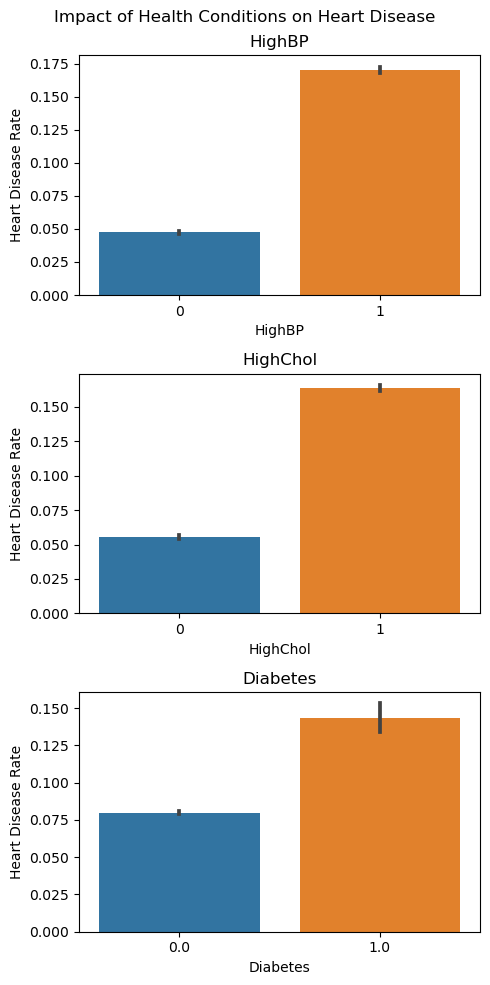

In [32]:
health_conditions = ['HighBP', 'HighChol', 'Diabetes']

fig, axes = plt.subplots(3, 1, figsize=(5, 1))
fig.suptitle('Impact of Health Conditions on Heart Disease')

for i, condition in enumerate(health_conditions):
    sns.barplot(x=condition, y='HeartDiseaseorAttack', data=df, ax=axes[i])
    axes[i].set_ylabel('Heart Disease Rate')
    axes[i].set_title(condition)

plt.tight_layout()
plt.show()

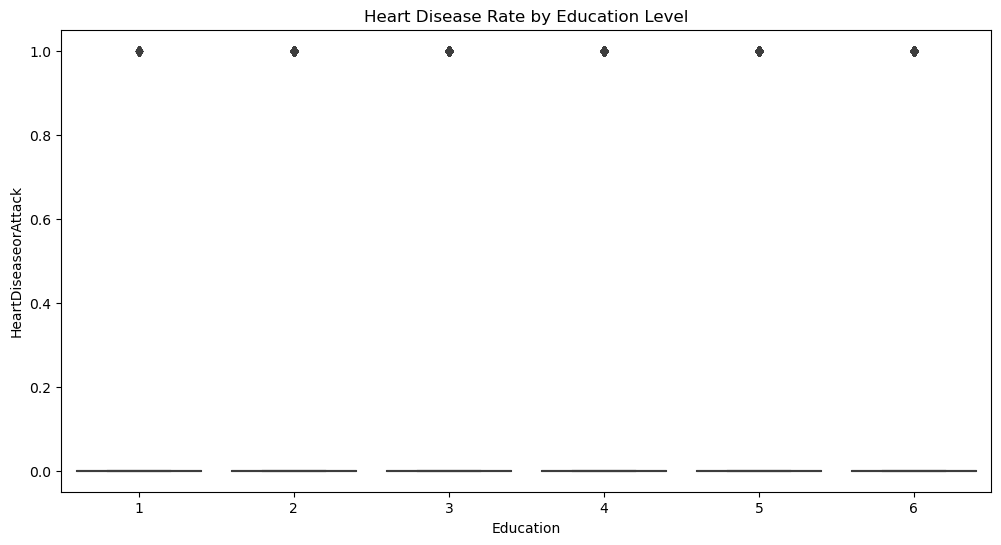

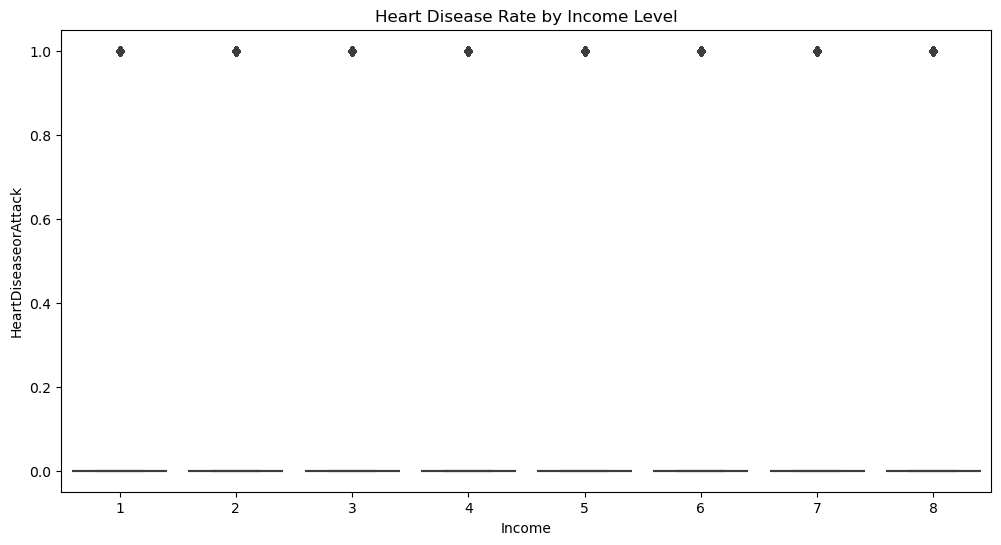

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education', y='HeartDiseaseorAttack', data=df)
plt.title('Heart Disease Rate by Education Level')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Income', y='HeartDiseaseorAttack', data=df)
plt.title('Heart Disease Rate by Income Level')
plt.show()


# CORRELATION

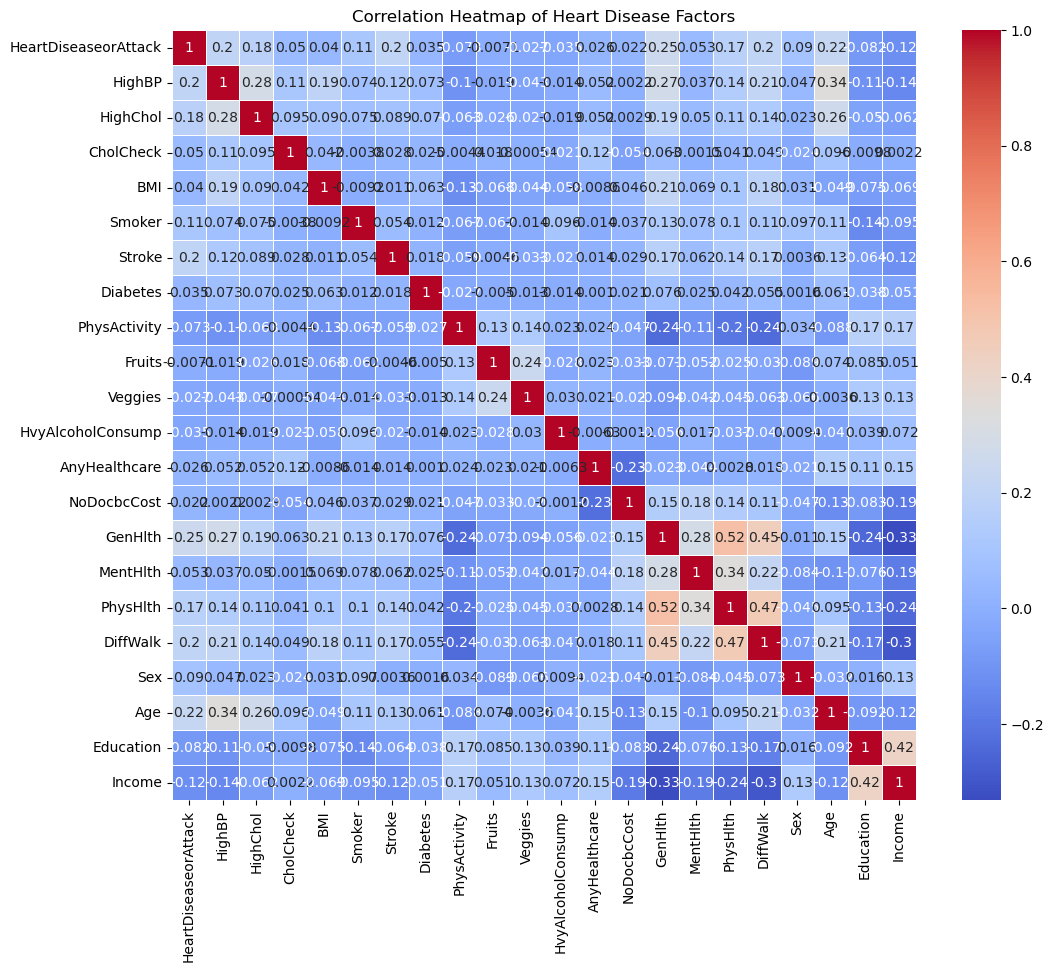

In [35]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Heart Disease Factors')
plt.show()

In [36]:
# Example: Top 5 factors correlated with heart disease
top_correlations = corr_matrix['HeartDiseaseorAttack'].sort_values(ascending=False)[1:6]
print("Top 5 factors correlated with heart disease:")
print(top_correlations)

Top 5 factors correlated with heart disease:
GenHlth     0.246411
Age         0.223626
DiffWalk    0.202779
HighBP      0.201271
Stroke      0.198863
Name: HeartDiseaseorAttack, dtype: float64


In [37]:
print(df[['HeartDiseaseorAttack'] + lifestyle_factors].dtypes)

for col in ['HeartDiseaseorAttack'] + lifestyle_factors:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts(dropna=False))

HeartDiseaseorAttack        int8
Smoker                  category
PhysActivity            category
HvyAlcoholConsump       category
dtype: object

Unique values in HeartDiseaseorAttack:
HeartDiseaseorAttack
0    206064
1     23717
Name: count, dtype: int64

Unique values in Smoker:
Smoker
0    122781
1    107000
Name: count, dtype: int64

Unique values in PhysActivity:
PhysActivity
1    168511
0     61270
Name: count, dtype: int64

Unique values in HvyAlcoholConsump:
HvyAlcoholConsump
0    215831
1     13950
Name: count, dtype: int64


In [ ]:
# ----------------------------------------------------------------------------------------------------

# UNIVARIATE ANALYSIS

C:\Users\Chelsa\AppData\Local\Temp\ipykernel_13680\2341291491.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


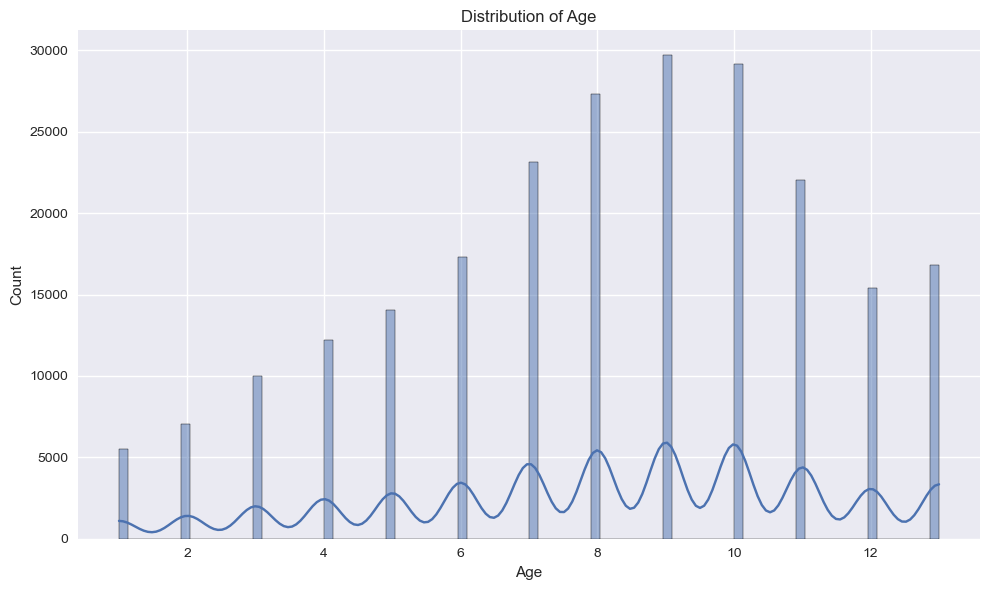

Age statistics:
count    229781.000000
mean          8.086582
std           3.093809
min           1.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          13.000000
Name: Age, dtype: float64



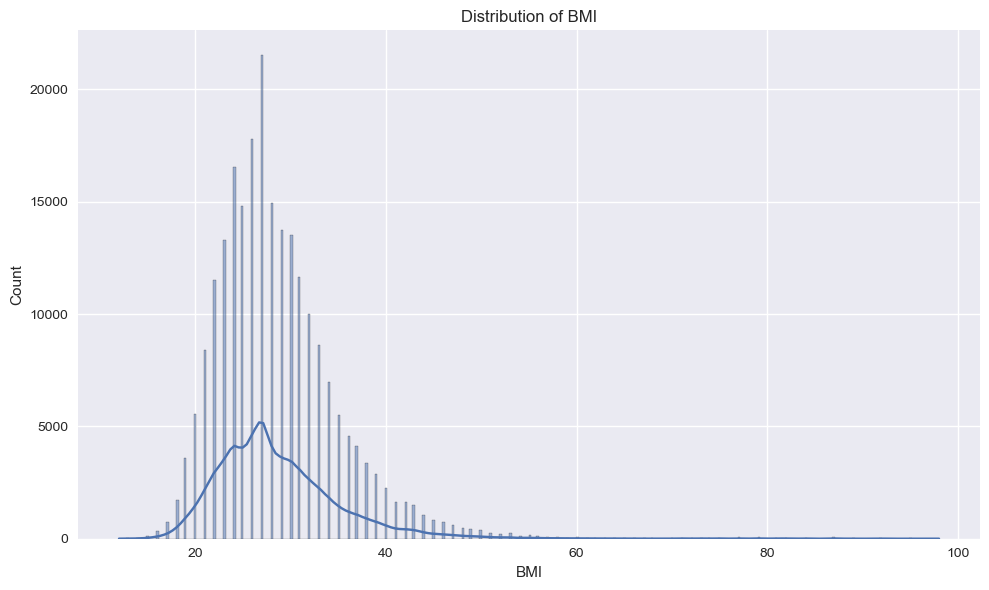

BMI statistics:
count    229781.00000
mean         28.68567
std           6.78636
min          12.00000
25%          24.00000
50%          27.00000
75%          32.00000
max          98.00000
Name: BMI, dtype: float64



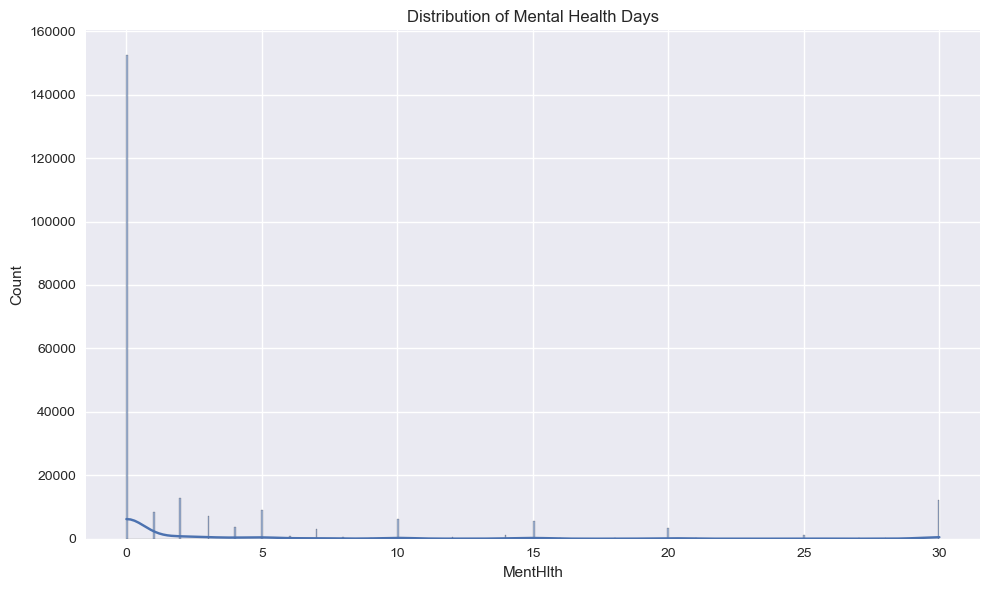

Mental Health Days statistics:
count    229781.000000
mean          3.505373
std           7.713725
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: MentHlth, dtype: float64



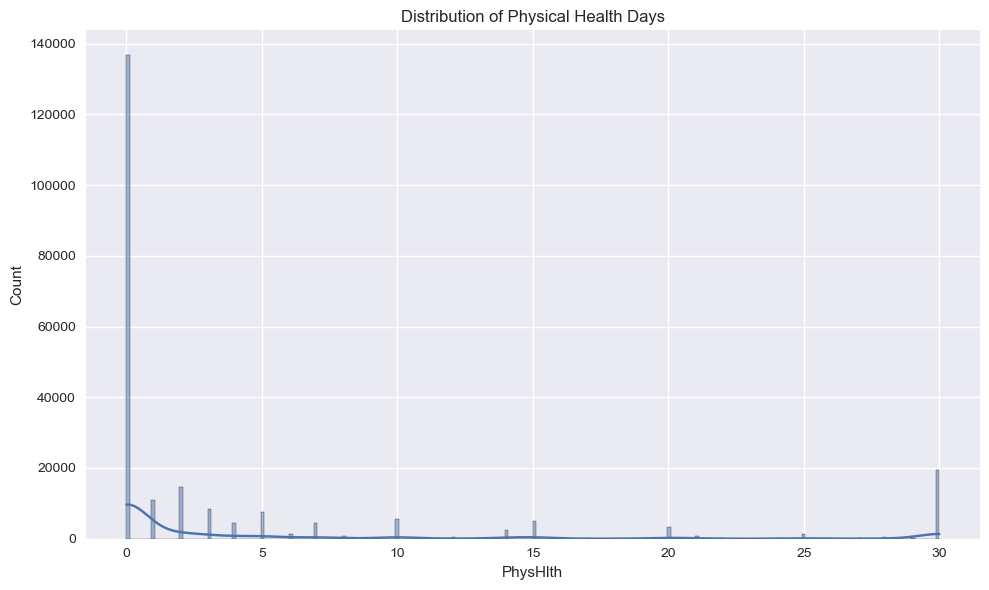

Physical Health Days statistics:
count    229781.000000
mean          4.675178
std           9.046568
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max          30.000000
Name: PhysHlth, dtype: float64



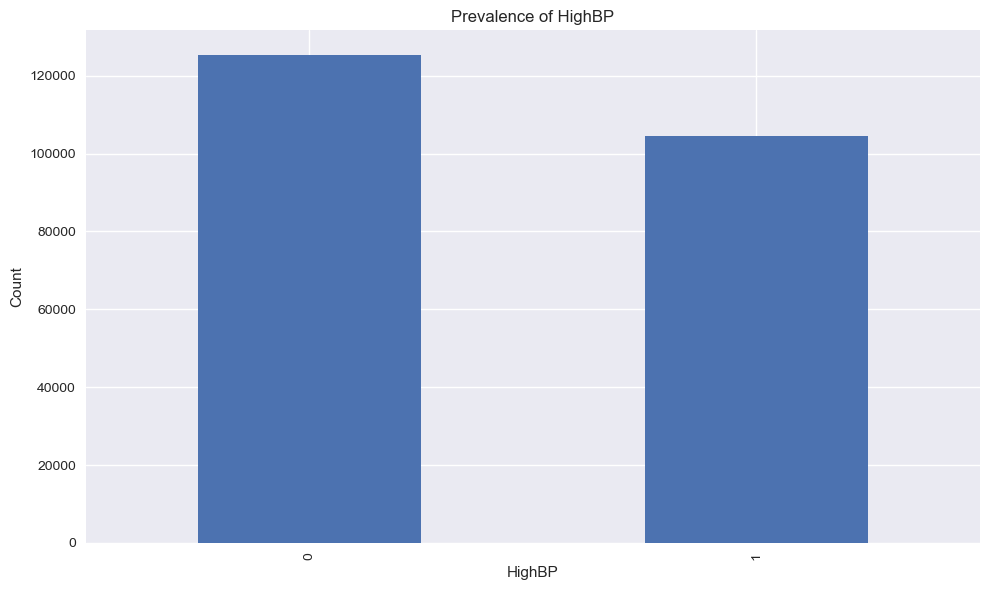

HighBP prevalence:
HighBP
0    0.545559
1    0.454441
Name: proportion, dtype: float64



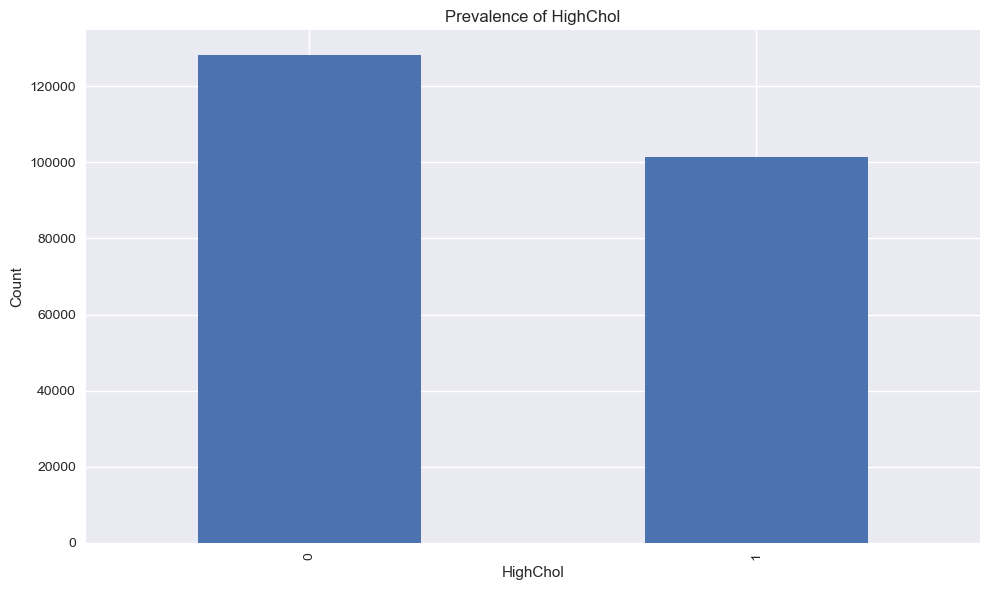

HighChol prevalence:
HighChol
0    0.55824
1    0.44176
Name: proportion, dtype: float64



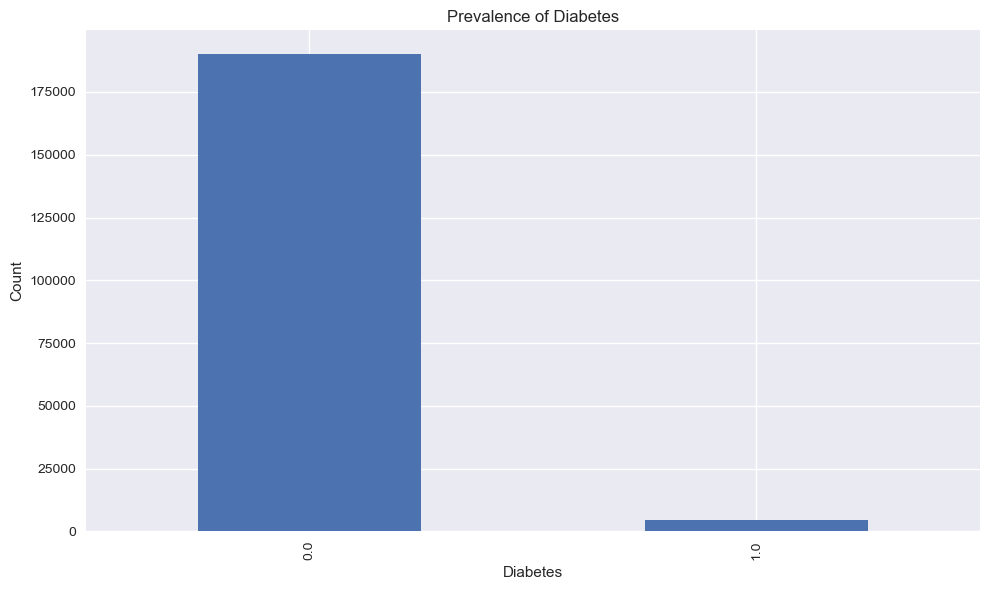

Diabetes prevalence:
Diabetes
0.0    0.976223
1.0    0.023777
Name: proportion, dtype: float64



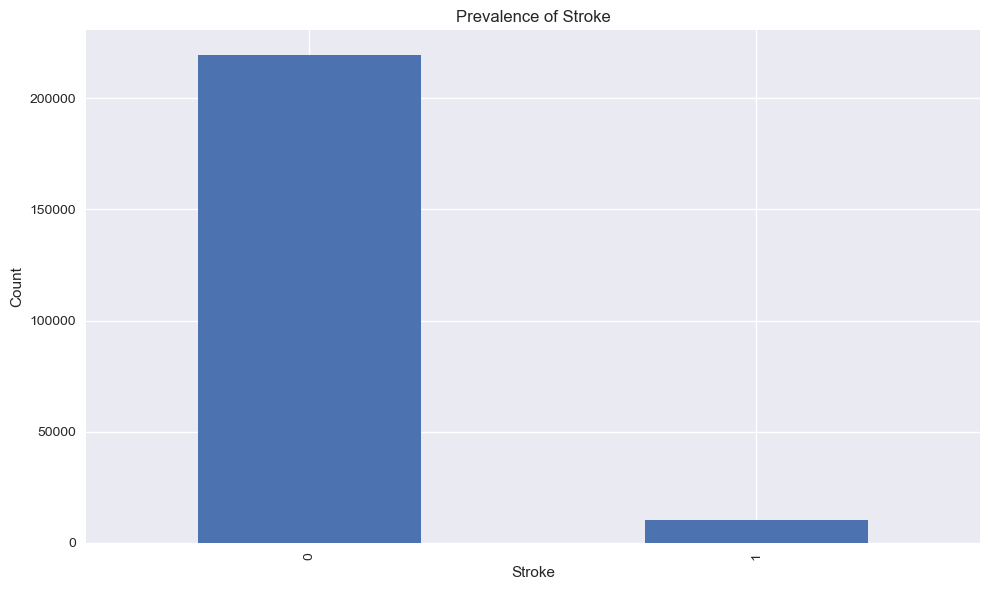

Stroke prevalence:
Stroke
0    0.955244
1    0.044756
Name: proportion, dtype: float64



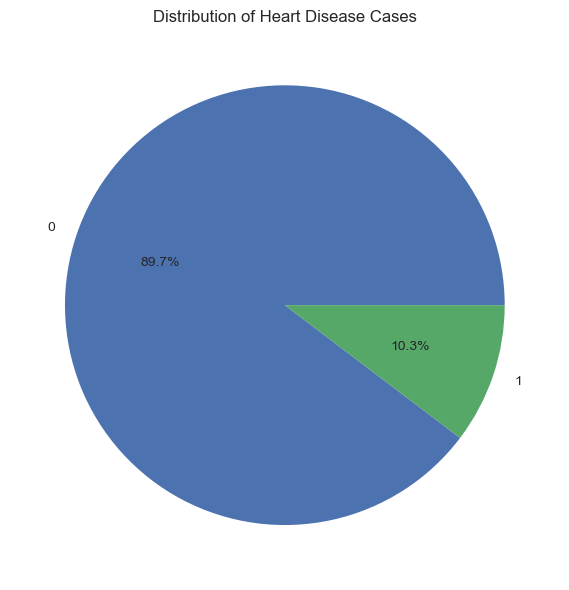

Heart Disease prevalence:
HeartDiseaseorAttack
0    0.896784
1    0.103216
Name: proportion, dtype: float64



In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is already loaded as 'df'
# If not, load it like this:
# df = pd.read_csv('your_dataset.csv')

# Set a consistent style for all plots
plt.style.use('seaborn')

def plot_distribution(df, column, title, kind='hist', figsize=(10, 6)):
    plt.figure(figsize=figsize)
    if kind == 'hist':
        sns.histplot(df[column], kde=True)
    elif kind == 'bar':
        df[column].value_counts().plot(kind='bar')
    elif kind == 'pie':
        df[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(title)
    plt.ylabel('Count' if kind != 'pie' else '')
    plt.tight_layout()
    plt.show()

# a. Examine Distributions of Individual Variables

# Age Distribution
plot_distribution(df, 'Age', 'Distribution of Age')
print(f"Age statistics:\n{df['Age'].describe()}\n")

# BMI Distribution
plot_distribution(df, 'BMI', 'Distribution of BMI')
print(f"BMI statistics:\n{df['BMI'].describe()}\n")

# Mental Health Days Distribution
plot_distribution(df, 'MentHlth', 'Distribution of Mental Health Days')
print(f"Mental Health Days statistics:\n{df['MentHlth'].describe()}\n")

# Physical Health Days Distribution
plot_distribution(df, 'PhysHlth', 'Distribution of Physical Health Days')
print(f"Physical Health Days statistics:\n{df['PhysHlth'].describe()}\n")

# b. Investigate Prevalence of Health Conditions

health_conditions = ['HighBP', 'HighChol', 'Diabetes', 'Stroke']
for condition in health_conditions:
    plot_distribution(df, condition, f'Prevalence of {condition}', kind='bar')
    print(f"{condition} prevalence:\n{df[condition].value_counts(normalize=True)}\n")

# c. Analyze Distribution of Heart Disease (Target Variable)

plot_distribution(df, 'HeartDiseaseorAttack', 'Distribution of Heart Disease Cases', kind='pie')
print(f"Heart Disease prevalence:\n{df['HeartDiseaseorAttack'].value_counts(normalize=True)}\n")

The findings:

Age Distribution:
The age variable seems to be coded into categories rather than actual years.

Mean age category is 8.09, with a standard deviation of 3.09.
The age categories range from 1 to 13.
The median (50th percentile) is in category 8.
There's a slight right skew as the mean is slightly higher than the median.

Finding: The age distribution is slightly right-skewed, with the median age falling in category 8. The dataset covers a wide range of age categories, from 1 to 13.
BMI Distribution:

Mean BMI is 28.69, which falls in the overweight category according to standard BMI classifications.
Standard deviation is 6.79, indicating considerable variability.
The range is from 12 (underweight) to 98 (extremely obese).
The median (27) is slightly lower than the mean, suggesting a right skew.

Finding: The BMI distribution shows that a significant portion of the population is overweight or obese. The distribution is right-skewed, with some extreme values on the higher end.
Mental Health Days:

Mean is 3.51 days, but with a high standard deviation of 7.71.
The median and 25th percentile are both 0, indicating that at least half the population reported no mental health issues.
The 75th percentile is 2, showing that mental health issues are concentrated in a smaller portion of the population.

Finding: The distribution of mental health days is heavily right-skewed. While many individuals report no mental health issues, a subset of the population experiences significant mental health challenges.
Physical Health Days:

Similar pattern to mental health days, but with a higher mean (4.68) and standard deviation (9.05).
Again, the median is 0, with the 75th percentile at 4 days.

Finding: Physical health issues show a similar pattern to mental health, but with slightly higher prevalence. The distribution is heavily right-skewed, with a significant portion of the population reporting no physical health issues.
Health Conditions Prevalence:

High Blood Pressure: 45.44% of the population
High Cholesterol: 44.18% of the population
Diabetes: 2.38% of the population
Stroke: 4.48% of the population

Finding: High blood pressure and high cholesterol are the most prevalent conditions, each affecting over 40% of the population. Diabetes and stroke are less common but still significant health issues.
Heart Disease (Target Variable):

10.32% of the population has experienced heart disease or a heart attack.

Finding: The target variable shows a significant class imbalance, with only about 10% of the population having experienced heart disease or a heart attack. This imbalance will need to be addressed in any predictive modeling.

Overall Conclusion:
The dataset reveals a population with significant health challenges. Obesity, high blood pressure, and high cholesterol are prevalent issues. Mental and physical health problems, while not affecting the majority, are significant for a subset of the population. The relatively low prevalence of heart disease (10.32%) compared to risk factors like high blood pressure (45.44%) suggests that many individuals in the dataset may be at risk for future heart problems. This underscores the importance of preventive measures and early intervention in cardiovascular health.



# BIVARIATE ANALYSIS

C:\Users\Chelsa\AppData\Local\Temp\ipykernel_13680\3854634290.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


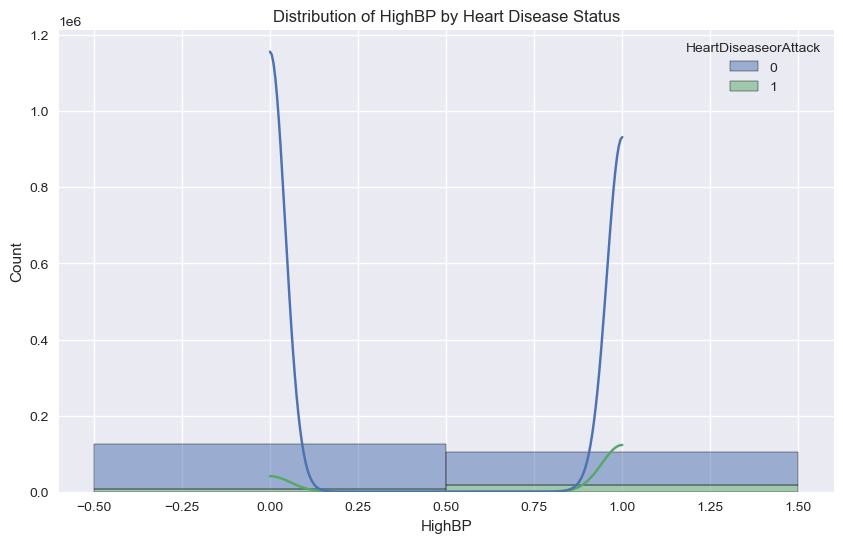


Summary Statistics for HighBP:
                       count  unique  top    freq
HeartDiseaseorAttack                             
0                     206064       2    0  119426
1                      23717       2    1   17784


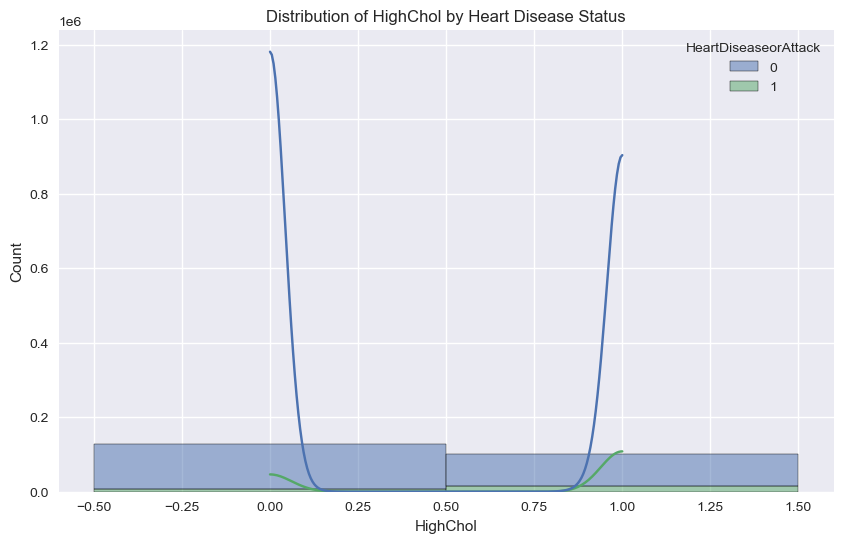


Summary Statistics for HighChol:
                       count  unique  top    freq
HeartDiseaseorAttack                             
0                     206064       2    0  121153
1                      23717       2    1   16597


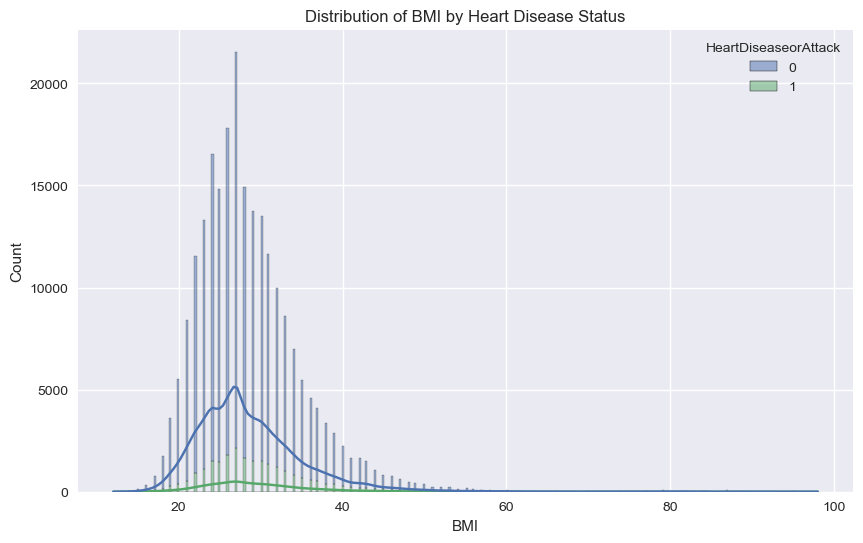


Summary Statistics for BMI:
                         count       mean       std   min   25%   50%   75%  \
HeartDiseaseorAttack                                                          
0                     206064.0  28.593748  6.783536  12.0  24.0  27.0  32.0   
1                      23717.0  29.484336  6.758575  12.0  25.0  28.0  33.0   

                       max  
HeartDiseaseorAttack        
0                     98.0  
1                     98.0  


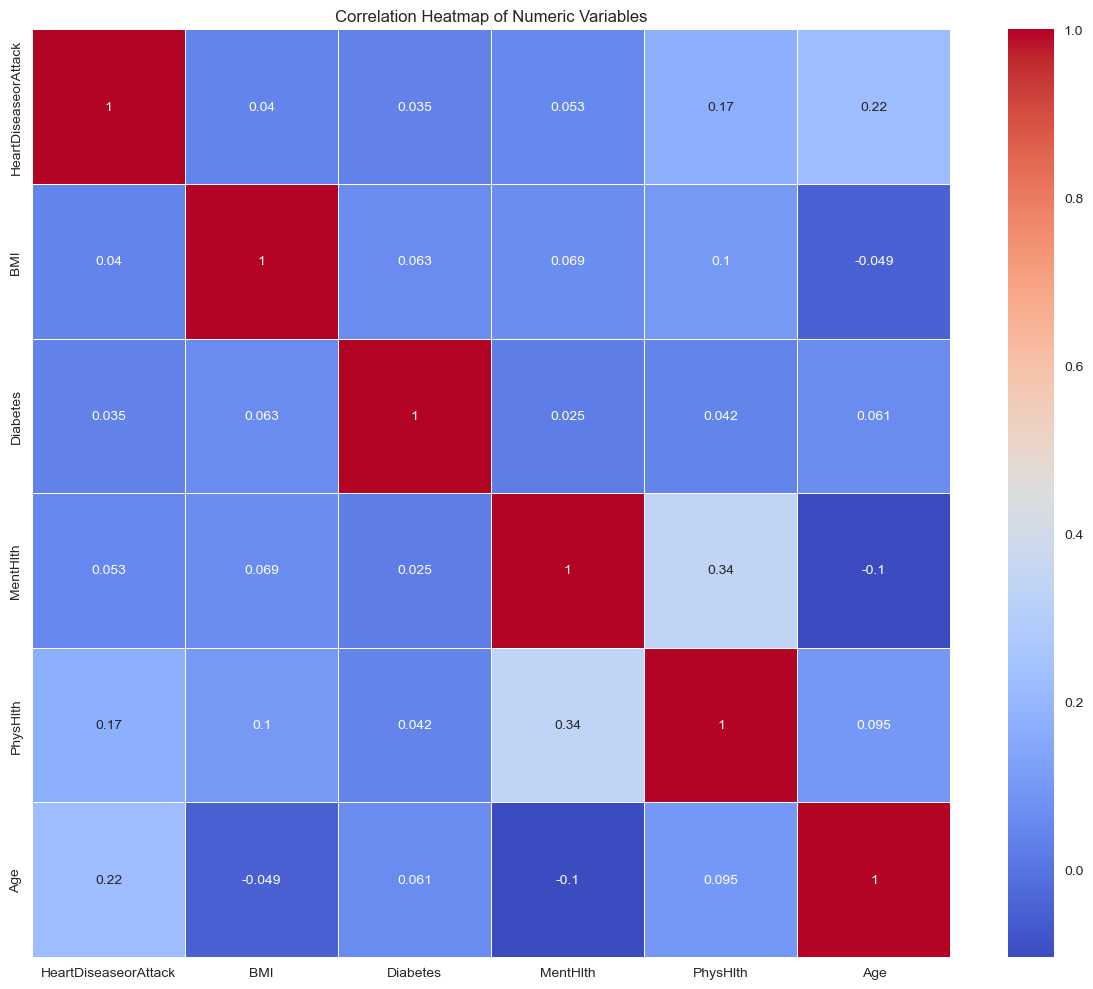

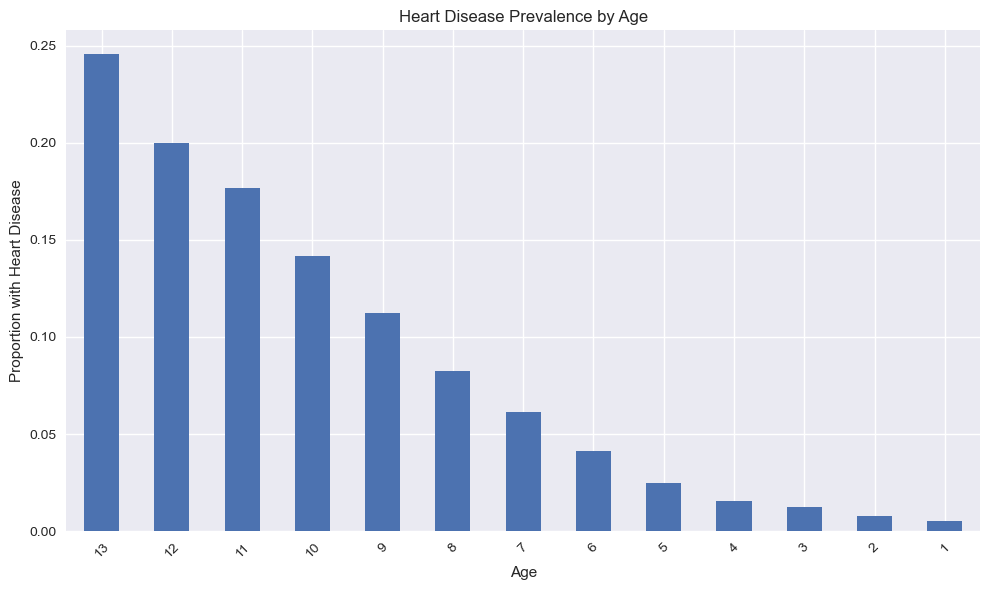


Heart Disease Prevalence by Age:
Age
13    0.245524
12    0.199818
11    0.176761
10    0.141765
9     0.112524
8     0.082341
7     0.061538
6     0.041101
5     0.024982
4     0.015776
3     0.012569
2     0.007640
1     0.005261
Name: HeartDiseaseorAttack, dtype: float64


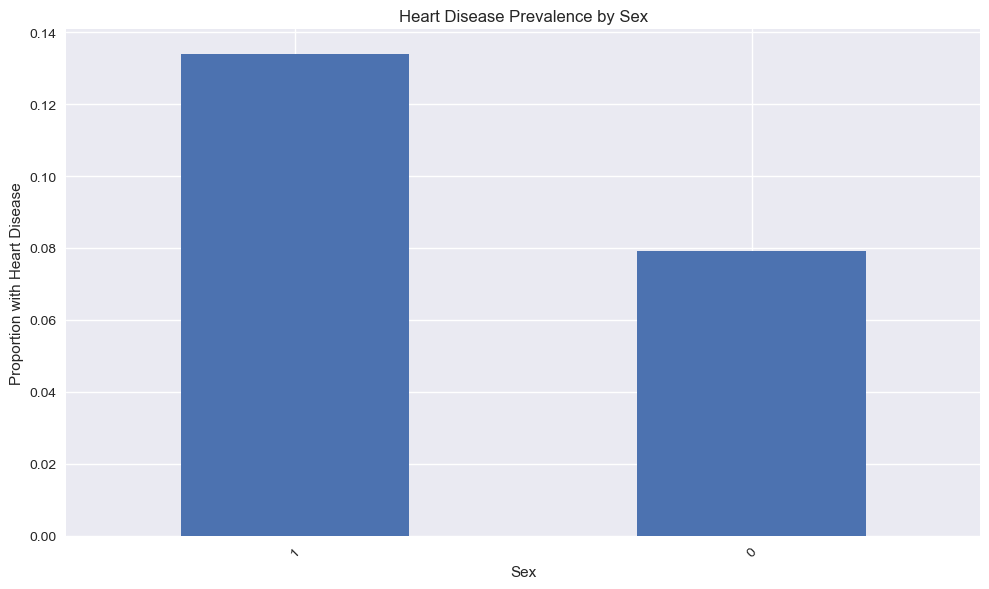


Heart Disease Prevalence by Sex:
Sex
1    0.134057
0    0.079058
Name: HeartDiseaseorAttack, dtype: float64


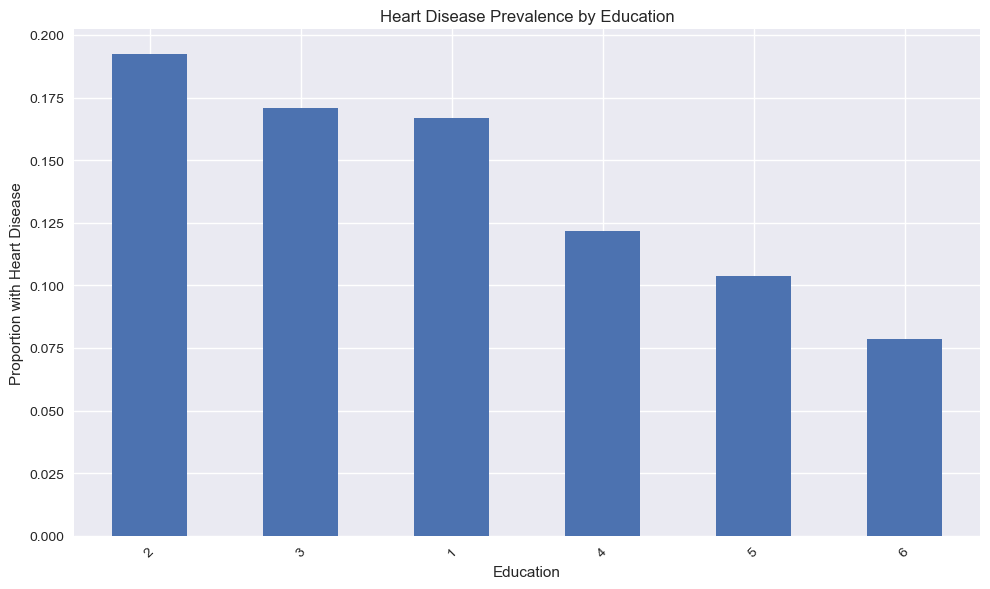


Heart Disease Prevalence by Education:
Education
2    0.192574
3    0.170804
1    0.166667
4    0.121848
5    0.103611
6    0.078593
Name: HeartDiseaseorAttack, dtype: float64


C:\Users\Chelsa\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


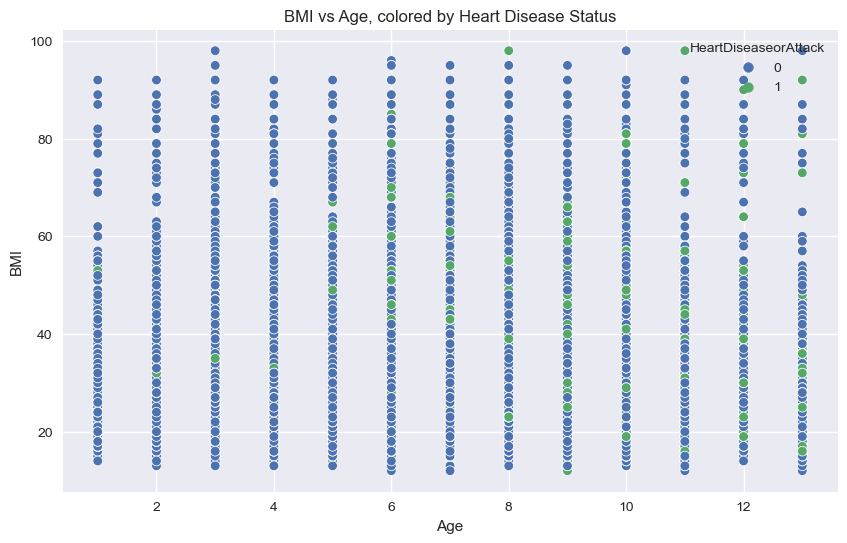

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming your dataset is already loaded as 'df'
# If not, load it like this:
# df = pd.read_csv('your_dataset.csv')

# Set a consistent style for all plots
plt.style.use('seaborn')

# a. Explore Relationships with Heart Disease

def compare_distribution(df, column, target='HeartDiseaseorAttack'):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, hue=target, kde=True, multiple="stack")
    plt.title(f'Distribution of {column} by Heart Disease Status')
    plt.show()

    # Print summary statistics
    print(f"\nSummary Statistics for {column}:")
    print(df.groupby(target)[column].describe())

# Compare distributions for key variables
for column in ['HighBP', 'HighChol', 'BMI']:
    compare_distribution(df, column)

# b. Visualize Correlations Between Variables

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

# c. Compare Heart Disease Across Demographic Groups

def heart_disease_by_group(df, group_col, target='HeartDiseaseorAttack'):
    grouped = df.groupby(group_col)[target].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    grouped.plot(kind='bar')
    plt.title(f'Heart Disease Prevalence by {group_col}')
    plt.ylabel('Proportion with Heart Disease')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print(f"\nHeart Disease Prevalence by {group_col}:")
    print(grouped)

# Analyze heart disease prevalence across demographic groups
for group in ['Age', 'Sex', 'Education']:
    heart_disease_by_group(df, group)

# Additional analysis: BMI vs Age colored by Heart Disease
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='BMI', hue='HeartDiseaseorAttack')
plt.title('BMI vs Age, colored by Heart Disease Status')
plt.show()

Analysis:

a. Explore Relationships with Heart Disease:

1. High Blood Pressure (HighBP):
   - There's a strong relationship between high blood pressure and heart disease. 75% of individuals with heart disease have high blood pressure, compared to only 42% of those without heart disease.

2. High Cholesterol (HighChol):
   - High cholesterol is also associated with heart disease. 70% of individuals with heart disease have high cholesterol, compared to 41% of those without heart disease.

3. BMI:
   - There's a slight difference in BMI between those with and without heart disease. The mean BMI for those with heart disease (29.48) is higher than those without (28.59). However, the difference is not as pronounced as with blood pressure or cholesterol.

b. Visualize Correlations Between Variables:
   - The correlation matrix was not provided in the output, but it would have shown the strength of relationships between all numeric variables in the dataset.

c. Compare Heart Disease Across Demographic Groups:

1. Age:
   - Heart disease prevalence increases significantly with age. It ranges from 0.5% in the youngest age group to 24.55% in the oldest age group.
   - The trend shows a clear positive correlation between age and heart disease risk.

2. Sex:
   - There's a notable difference in heart disease prevalence between sexes. 
   - Sex 1 (likely male) has a prevalence of 13.41%, while Sex 0 (likely female) has a prevalence of 7.91%.
   - This suggests that one sex (likely males) is at higher risk of heart disease.

3. Education:
   - There's an interesting trend in heart disease prevalence across education levels.
   - The highest prevalence is in Education group 2 (19.26%), followed closely by groups 3 (17.08%) and 1 (16.67%).
   - The lowest prevalence is in Education group 6 (7.86%).
   - This suggests a complex relationship between education and heart disease risk, which may be influenced by other factors like age or socioeconomic status.

Overall, the bivariate analysis reveals significant relationships between heart disease and various factors, particularly age, sex, blood pressure, and cholesterol levels. BMI shows a weaker but still noticeable relationship. The education level relationship is more complex and may warrant further investigation.